<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques that are used to avoid overfitting (but haven't practiced them yet). In this project, we'll practice a fundamental method for avoiding overfitting that is commonly referred to as: _train/test split validation_. 

This is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we will be splitting the data into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California, 20 percent data from elsewhere, and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case, we've still overfit on our data set because we did not sufficiently randomize the data.

Note: In a situation like this, you could use a technique called _k-fold cross-validation_, which is cross-validation applied to more than two subsets. In particular, in k-fold cross-validation, you'd partition your data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. You would do this for each of the possible $k-1$ subsets.

# Project Requirements

The goal of this project will be to create a test-training split to compare multiple models on the same Boston housing data set. For example, you might choose to compare different linear models on the same data.

In this project, you'll fit two to three different models on the Boston housing data. For example, you could pick two different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Work with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train your model on the training data.
* Evaluate your model on the test data.
* Repeat with other variables.
* Rank the models by how well they score on the testing data set. 
* Don't forget to interpret your findings! 



A k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression

As a real estate developer, you are being asked to model the median home price of various houses in the city of Boston using data from the US census. Your goal is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = '../data/boston_data.csv'
boston = pd.read_csv(url)
boston.rename(columns={' ZN ':'ZN', 'INDUS ': 'INDUS'}, inplace=True)


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per \\$10,000

PTRATIO: Pupil-teacher ratio by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

### REQUIRED: Clean Up Data and Perform Exporatory Data Analysis

In [3]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


Boston data is from scikit-learn, so it _ought_ to be pretty clean, but you should always perform exploratory data analysis.

In [4]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column


In [5]:
boston.info() #gets total nulls and index.  No null values in the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [6]:
boston.dtypes #gets data type of each column

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
boston.shape #gets shape

(506, 13)

In [8]:
boston.describe() #gets summary statistics

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [9]:
boston.nunique() #gets number of unique values in each column

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

In [10]:
boston.head() #gets first five values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [11]:
boston.tail() #gets last five values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'LSTAT'}>],
       [<AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

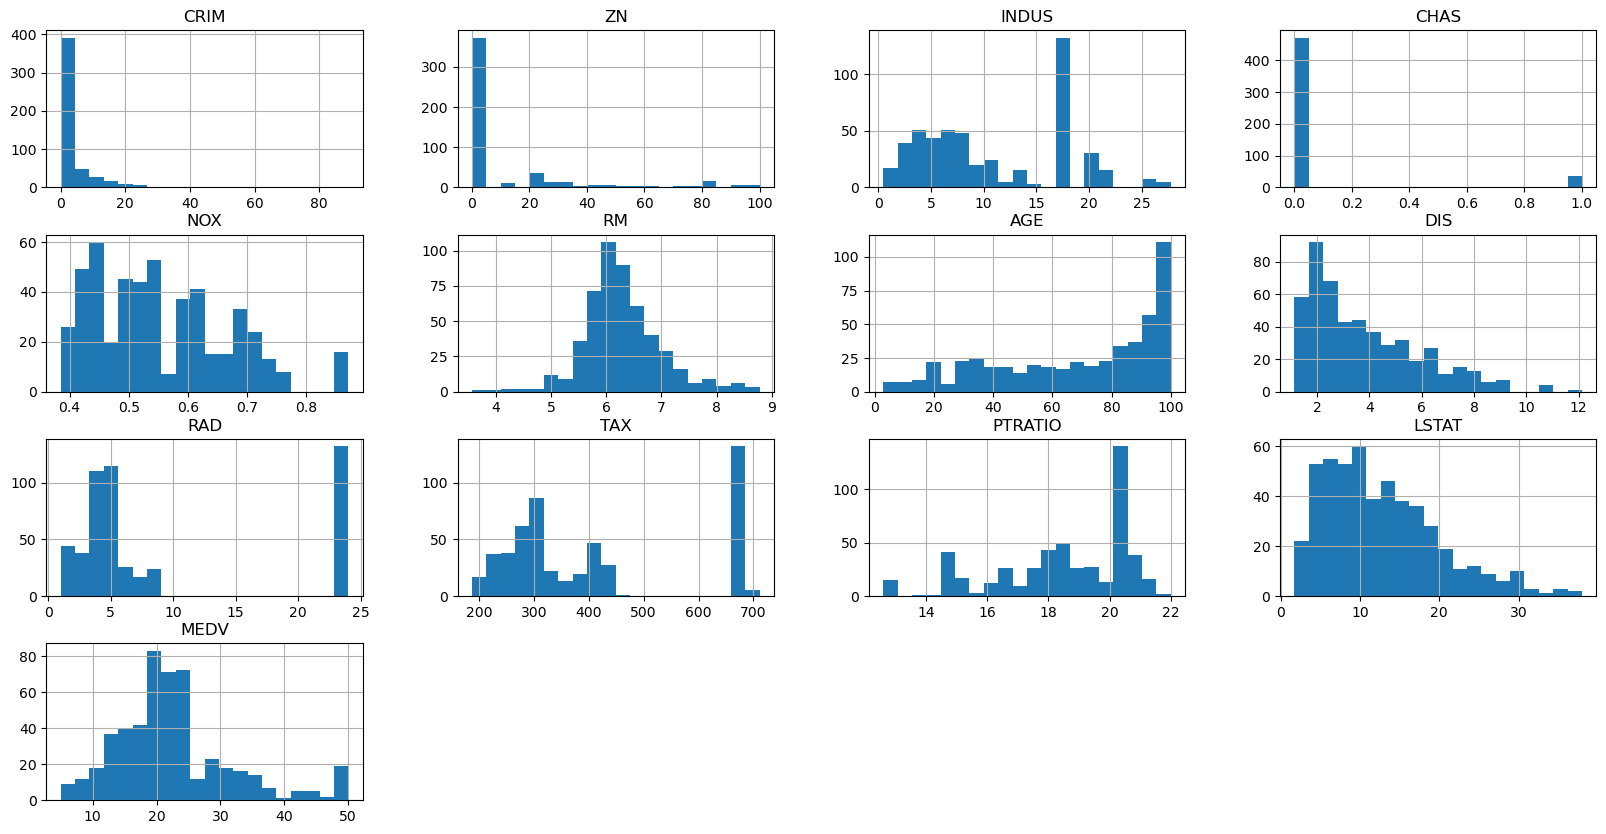

In [12]:
boston.hist(bins = 20, figsize=(20, 10)) #see distribution of values

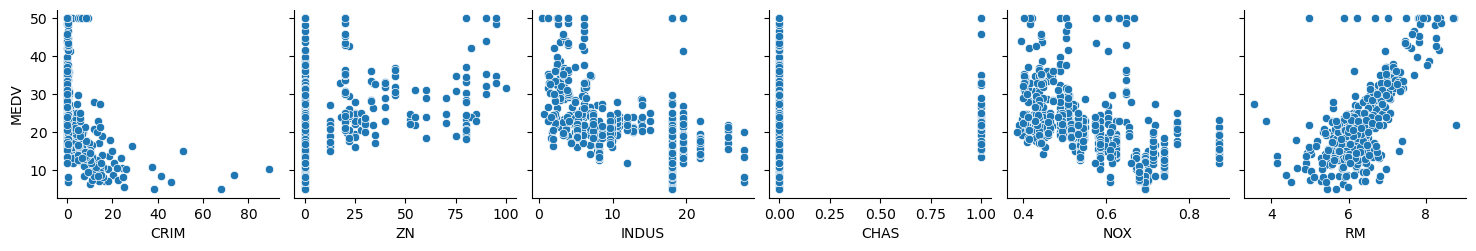

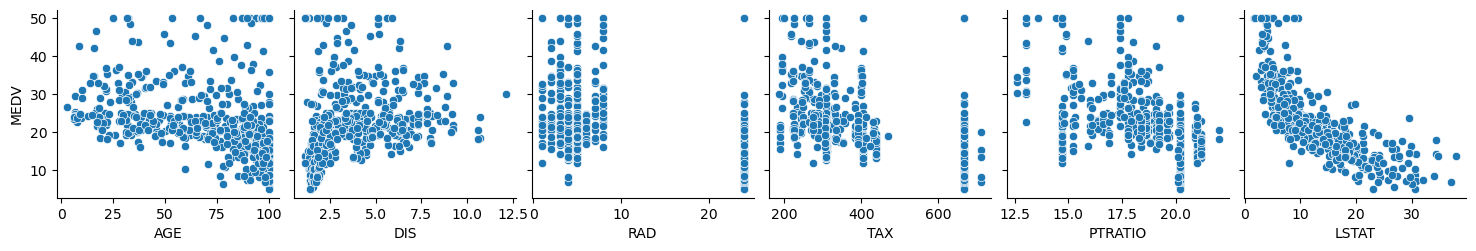

In [13]:
# see how the variables relate to MEDV
cols_1 = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM']
cols_2 = ['AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
sns.pairplot(boston, x_vars=cols_1, y_vars='MEDV');
sns.pairplot(boston, x_vars=cols_2, y_vars='MEDV');

<AxesSubplot:>

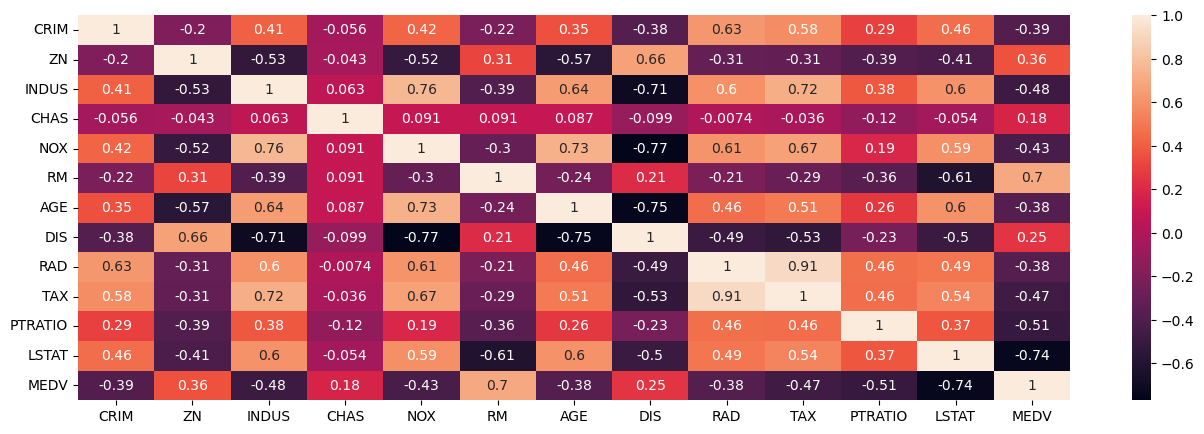

In [14]:
# Visualize correlation matrix in Seaborn using a heat map.
plt.figure(figsize=(16,5))
sns.heatmap(boston.corr(), annot = True)

## Using `scikit-learn` Linear Regression

### REQUIRED: Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict your target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [15]:
# Following predictors will be used to predict influence on target variable MEDV
# (Median value of owner-occupied homes in $1000's):

# 1) CRIM: per capita crime rate by town
# 2) NOX: nitric oxides concentration (parts per 10 million)
# 3) INDUS: proportion of non-retail business acres per town
# 4) AGE: proportion of owner-occupied units built prior to 1940


In [16]:
# Function that returns the RMSE and plot for individual variables
# Will not return plot if there is more than one variable as the x-axis will be different
def train(df, cols):
    X = df[cols]
    y = df.MEDV
    
    linreg = LinearRegression()
    linreg.fit(X, y)
    y_pred = linreg.predict(X)
    
    y_null = np.zeros_like(y, dtype = float)
    y_null.fill(y.mean())
    
    null_RMSE = np.sqrt(metrics.mean_squared_error(y, y_null))
    RMSE = np.sqrt(metrics.mean_squared_error(y, y_pred))
    R2_score = metrics.r2_score(y, y_pred)
    
    print(cols, 'Intercept:', linreg.intercept_)
    print(cols, 'Co-efficent:', linreg.coef_)
    
    print(cols, 'MAE:',metrics.mean_absolute_error(y, y_pred))
    print(cols, 'MSE:',metrics.mean_squared_error(y, y_pred))
    
    print(cols,'null RMSE',null_RMSE)
    print(cols, 'RMSE:',RMSE)
    print(cols, 'R2_score:',R2_score)
    print('No. of variables:',len(cols))

    
    if len(cols) == 1:
        
        plt.rcParams["figure.figsize"] = (10,4)
        plt.xlabel(cols)
        plt.ylabel('MEDV')
        plt.scatter(X, y, color = 'darkcyan')
        plt.plot(X, y_pred, color = 'k')
        plt.show()
    

['CRIM'] Intercept: 24.03310617412388
['CRIM'] Co-efficent: [-0.41519028]
['CRIM'] MAE: 6.135297186403407
['CRIM'] MSE: 71.69073588196659
['CRIM'] null RMSE 9.188011545278203
['CRIM'] RMSE: 8.467038200100824
['CRIM'] R2_score: 0.15078046904975717
No. of variables: 1


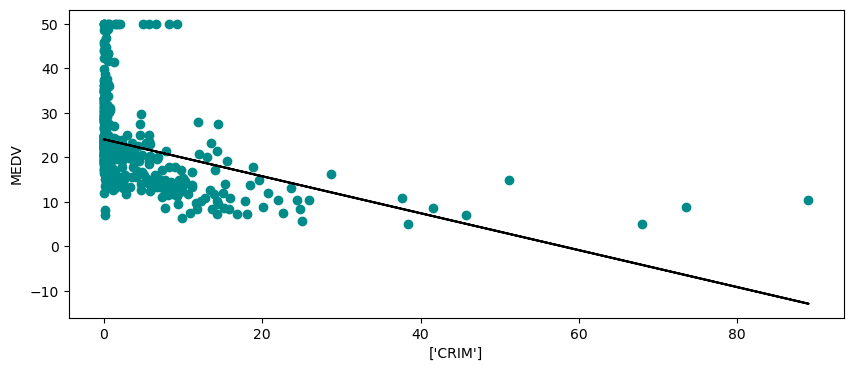

In [17]:
# Score and plot for CRIM
train(boston, ['CRIM'])

['NOX'] Intercept: 41.345874467973246
['NOX'] Co-efficent: [-33.91605501]
['NOX'] MAE: 5.971323159053393
['NOX'] MSE: 69.00428835540669
['NOX'] null RMSE 9.188011545278203
['NOX'] RMSE: 8.306881987569504
['NOX'] R2_score: 0.182603042501699
No. of variables: 1


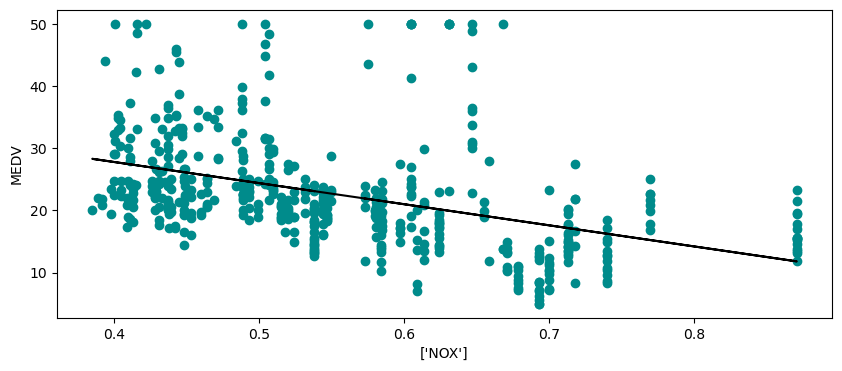

In [18]:
# Score and plot for CRIM
train(boston, ['NOX'])

['INDUS'] Intercept: 29.754896511928486
['INDUS'] Co-efficent: [-0.64849005]
['INDUS'] MAE: 5.776538480249924
['INDUS'] MSE: 64.6662216410753
['INDUS'] null RMSE 9.188011545278203
['INDUS'] RMSE: 8.04153105080589
['INDUS'] R2_score: 0.2339900304444752
No. of variables: 1


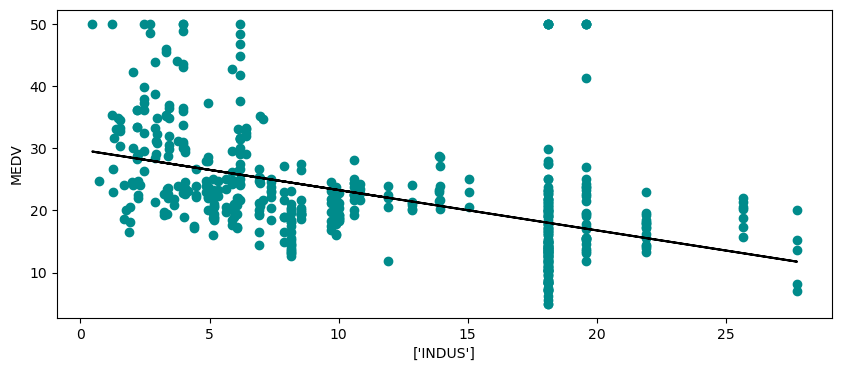

In [19]:
# Score and plot for INDUS
train(boston, ['INDUS'])

['AGE'] Intercept: 30.978677762618037
['AGE'] Co-efficent: [-0.12316272]
['AGE'] MAE: 5.984744717749341
['AGE'] MSE: 72.42398092899336
['AGE'] null RMSE 9.188011545278203
['AGE'] RMSE: 8.510228018625197
['AGE'] R2_score: 0.14209474407780465
No. of variables: 1


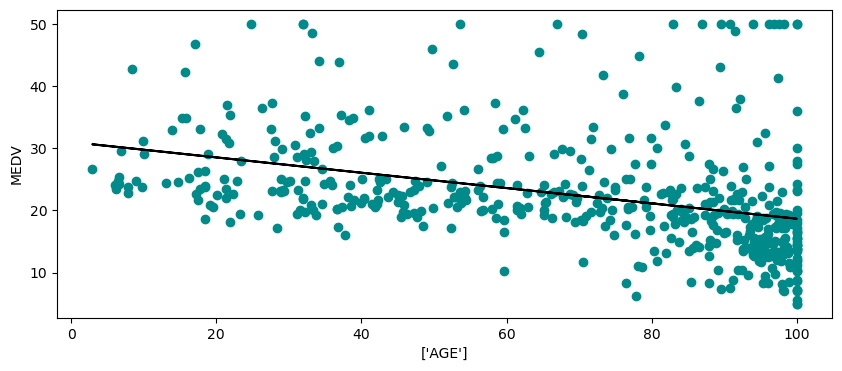

In [20]:
# Score and plot for AGE
train(boston, ['AGE'])

In [21]:
# Score for CRIM, NOX, INDUS and AGE
train(boston, ['CRIM', 'NOX', 'INDUS', 'AGE'])


['CRIM', 'NOX', 'INDUS', 'AGE'] Intercept: 31.589923064132172
['CRIM', 'NOX', 'INDUS', 'AGE'] Co-efficent: [-0.23192658 -3.82553405 -0.43077784 -0.01895099]
['CRIM', 'NOX', 'INDUS', 'AGE'] MAE: 5.492603783155775
['CRIM', 'NOX', 'INDUS', 'AGE'] MSE: 60.6029808236078
['CRIM', 'NOX', 'INDUS', 'AGE'] null RMSE 9.188011545278203
['CRIM', 'NOX', 'INDUS', 'AGE'] RMSE: 7.784791636492772
['CRIM', 'NOX', 'INDUS', 'AGE'] R2_score: 0.28212154170178394
No. of variables: 4


## Analysis

| Variable |                      Co-efficient                      |  RMSE | Null RMSE | R2 Score |
|:--------:|:------------------------------------------------------:|:-----:|:---------:|:--------:|
|   CRIM   |                         -0.415                         | 8.467 |   9.188   |   0.151  |
|    NOX   |                         -33.916                        | 8.307 |   9.188   |   0.183  |
|   INDUS  |                         -0.648                         | 8.042 |   9.188   |   0.234  |
|    AGE   |                         -0.123                         | 8.510 |   9.188   |   0.142  |
| Combined | CRIM= -0.232; NOX= -3.826; INDUS= -0.431; AGE= -0.019; | 7.785 |   9.188   |   0.282  |

<u> Independent Models </u>

Of the four variables, air quality appears to have the largest negative correlation with housing value - a 0.1 unit increase in nitric oxides concentration is correlated with a decrease of about \$3,400 in median house price.  The decrease in median house price is likely due to demand for such houses as it is unlikely people would like to live in polluted areas given the negative impact on their health.

Industrial density has the second largest negative correlation with housing value - a 1 unit increase in proportion of non-retail business acres per town is correlated with a decrease of about \$650 in median house price.  The decrease in median house price is likely due to demand for such houses as it is unlikely people would prefer living in a neighbourhood surrounded by factories compared to parks and shopping centres.  Industrial density is also likely correlated with air pollution given that factories are more likely to emit harmful pollutants (e.g. nitric oxide) compared to parks and shopping centres.

Crime rate has the third largest negative correlation with housing value - a 1 unit increase in per capita crime rate by town is correlated with a decrease of about \\$415 in median house price.  However, it is also noted that there are very few data points for houses in very high crime rate areas (i.e. the data distribution is right skewed).  This suggests that the model is unlikely to be accurate in predicting the median housing price in very high crime areas.  The decrease in median house price is likely due to demand for such houses as it is unlikely people would prefer living in a neighbourhood where their lives and property are in immediate danger.

Age of an estate has the smallest negative correlation with housing value - a 1 unit increase in proportion of owner-occupied units built prior to 1940 is correlated with a decrease of about \$123 in median house price.  The relatively small decrease in median house price is likely due to the likelihood that estates with old buildings are relatively well-maintained and have alot of amenities which helps to maintain its value.  

RMSE of the four models hover between 8.04 (INDUS) to 8.51 (AGE).  They are all lower than the null RMSE (9.188) which suggests that they are better models.

The variables with the highest and lowest R square errors are INDUS (0.234) and AGE (0.142) respectively.  This suggests that the INDUS model is better in predicting the MEDV value compared to the other variables.

<u> Combined Model </u>

For the combined model, the order of the variables with regard to the strength of the correlation with the housing value does not change.  Air quality still has the largest impact followed by industrial density, crime rate and finally age of an estate.  However, it is noted that the strength of the correlation has changed dropped across all models.  For instance, a 1 unit increase in proportion of non-retail business acres per town is now correlated with a decrease of about \\$431 in median house price, a drop of about 33% from \\$650.  Similarly, a 1 unit increase in per capita crime rate by town is correlated with a decrease of about \\$232 in median house price, a drop of about 44% from \\$415.

The R square error score of the combined model is higher than R square error scores of all the independent models (0.282 vs 0.142 - 0.234).  This suggests that the combined model is slightly better in predicting the dependent variable.


### REQUIRED: Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.
Score and plot both of these approaches. How do your metrics change? What does this tell us about the size of training/testing splits? Include a written response.

In [22]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Function for 70/30 train/test/split scenario that returns the RMSE and plot
# Will not return plot if there is more than one variable as the x-axis will be different

def train_test_rmse_70_30(df, feature_cols):
    X = df[feature_cols]
    y = df.MEDV

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)

    y_null = np.zeros_like(y_test, dtype = float)
    y_null.fill(y_test.mean())

    null_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_null))
    RMSE_70_30 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2_score_70_30 = metrics.r2_score(y_test, y_pred)
    
    print(feature_cols,'Intercept 70_30:', linreg.intercept_)
    print(feature_cols,'Co-efficent 70_30:', linreg.coef_)
    print(feature_cols,'MAE 70_30:',metrics.mean_absolute_error(y_test, y_pred))
    print(feature_cols,'MSE 70_30:',metrics.mean_squared_error(y_test, y_pred))
    print(feature_cols,'null RMSE',null_RMSE)
    print(feature_cols,'RMSE 70_30:',RMSE_70_30)
    print(feature_cols,'R2_70_30:',R2_score_70_30)
    
    if len(feature_cols) == 1:
        
        plt.rcParams["figure.figsize"] = (10,4)
        plt.xlabel(feature_cols)
        plt.ylabel('MEDV')
        plt.scatter(X, y, color = 'darkcyan')
        plt.plot(X_test, y_pred, color = 'k')
        plt.show()


['CRIM'] Intercept 70_30: 24.142251139381596
['CRIM'] Co-efficent 70_30: [-0.39261904]
['CRIM'] MAE 70_30: 6.176862952678595
['CRIM'] MSE 70_30: 69.42784011910118
['CRIM'] null RMSE 8.990444464676797
['CRIM'] RMSE 70_30: 8.332337014253635
['CRIM'] R2_70_30: 0.14104318582129738


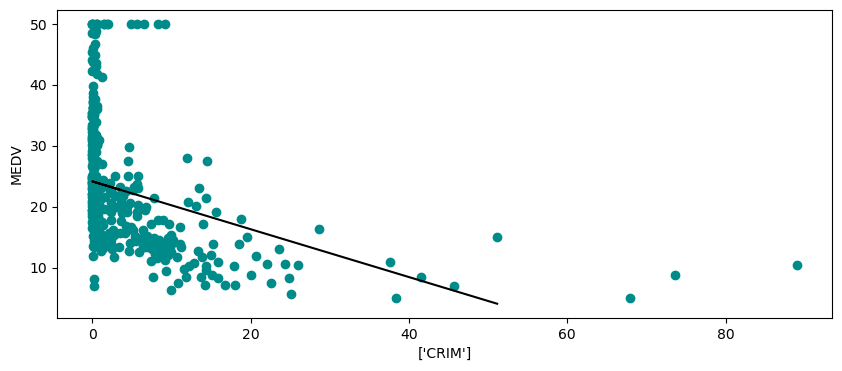

In [23]:
# Score and plot for CRIM 70% train 30% test
train_test_rmse_70_30(boston, ['CRIM'])

['NOX'] Intercept 70_30: 42.566165342656035
['NOX'] Co-efficent 70_30: [-36.00506449]
['NOX'] MAE 70_30: 6.0047524071372385
['NOX'] MSE 70_30: 69.15943872541288
['NOX'] null RMSE 8.990444464676797
['NOX'] RMSE 70_30: 8.316215408791
['NOX'] R2_70_30: 0.14436383076211834


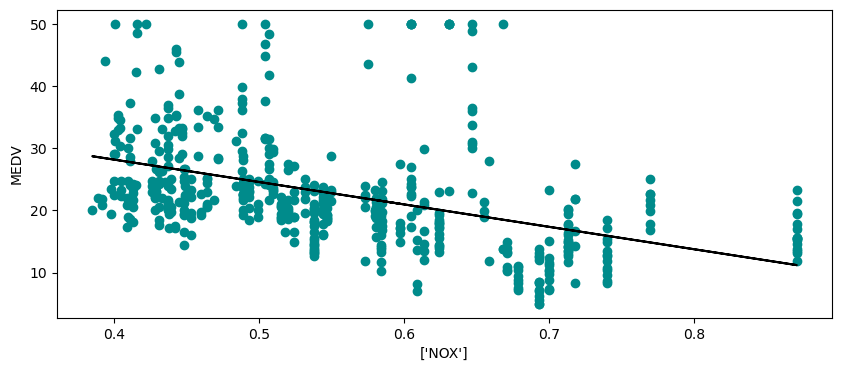

In [24]:
# Score and plot for NOX 70% train 30% test
train_test_rmse_70_30(boston, ['NOX'])

['INDUS'] Intercept 70_30: 30.27342986152488
['INDUS'] Co-efficent 70_30: [-0.68980663]
['INDUS'] MAE 70_30: 5.917611204642523
['INDUS'] MSE 70_30: 67.45524768379107
['INDUS'] null RMSE 8.990444464676797
['INDUS'] RMSE 70_30: 8.213114371770983
['INDUS'] R2_70_30: 0.16544797374211317


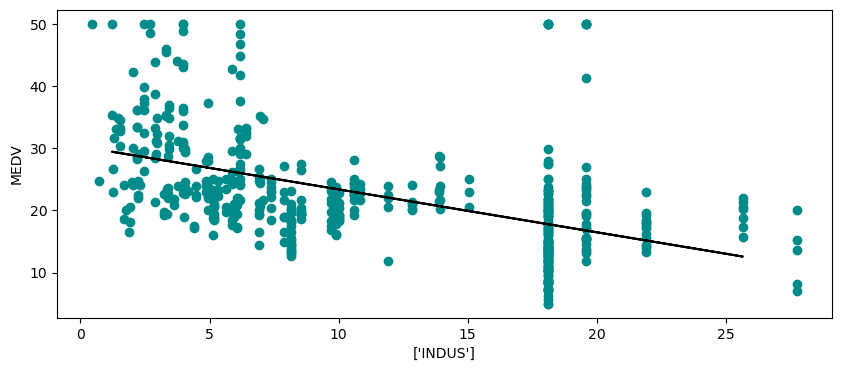

In [25]:
# Score and plot for INDUS 70% train 30% test
train_test_rmse_70_30(boston, ['INDUS'])

['AGE'] Intercept 70_30: 31.197929823508375
['AGE'] Co-efficent 70_30: [-0.12468185]
['AGE'] MAE 70_30: 5.943300300598785
['AGE'] MSE 70_30: 70.37725149198042
['AGE'] null RMSE 8.990444464676797
['AGE'] RMSE 70_30: 8.389115060122874
['AGE'] R2_70_30: 0.12929712881024225


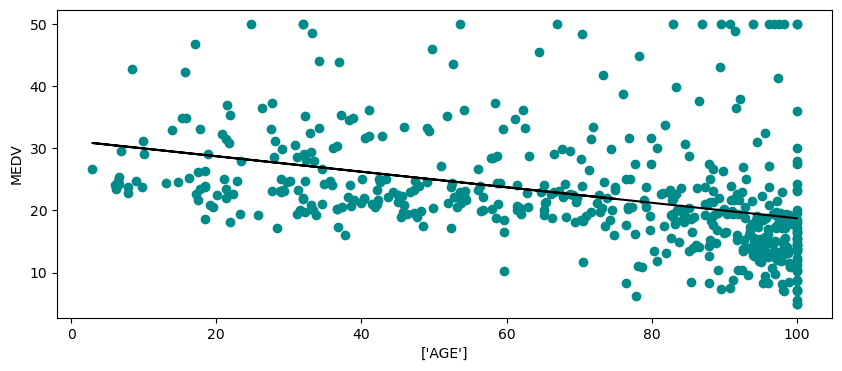

In [26]:
# Score and plot for AGE 70% train 30% test
train_test_rmse_70_30(boston, ['AGE'])

In [27]:
# Score for CRIM, NOX, INDUS and AGE 70% train 30% test

train_test_rmse_70_30(boston, ['CRIM', 'NOX', 'INDUS', 'AGE'])

['CRIM', 'NOX', 'INDUS', 'AGE'] Intercept 70_30: 31.913091927198366
['CRIM', 'NOX', 'INDUS', 'AGE'] Co-efficent 70_30: [-0.21885479 -4.1915692  -0.49705712 -0.00980755]
['CRIM', 'NOX', 'INDUS', 'AGE'] MAE 70_30: 5.609062067915073
['CRIM', 'NOX', 'INDUS', 'AGE'] MSE 70_30: 63.35813136324216
['CRIM', 'NOX', 'INDUS', 'AGE'] null RMSE 8.990444464676797
['CRIM', 'NOX', 'INDUS', 'AGE'] RMSE 70_30: 7.959782117824719
['CRIM', 'NOX', 'INDUS', 'AGE'] R2_70_30: 0.21613723580155675


In [28]:
# Function for 90/10 train/test/split scenario that returns the RMSE and plot
# Will not return plot if there is more than one variable as the x-axis will be different
def train_test_rmse_90_10(df, feature_cols):
    X = df[feature_cols]
    y = df.MEDV

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, train_size = 0.9, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    y_null = np.zeros_like(y_test, dtype = float)
    y_null.fill(y_test.mean())

    null_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_null))
    RMSE_90_10 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2_score_90_10 = metrics.r2_score(y_test, y_pred)

    print(feature_cols,'Intercept 90_10:', linreg.intercept_)
    print(feature_cols,'Co-efficent 90_10:', linreg.coef_)
    print(feature_cols,'MAE 90_10:',metrics.mean_absolute_error(y_test, y_pred))
    print(feature_cols,'MSE 90_10:',metrics.mean_squared_error(y_test, y_pred))
    print(feature_cols,'null RMSE',null_RMSE)
    print(feature_cols,'RMSE 90_10:',RMSE_90_10)
    print(feature_cols,'R2_90_10:',R2_score_90_10)

    if len(feature_cols) == 1:
    
        plt.rcParams["figure.figsize"] = (10,4)
        plt.xlabel(feature_cols)
        plt.ylabel('MEDV')
        plt.scatter(X, y, color = 'darkcyan')
        plt.plot(X_test, y_pred, color = 'k')
        plt.show()

['CRIM'] Intercept 90_10: 23.770747261587864
['CRIM'] Co-efficent 90_10: [-0.4284581]
['CRIM'] MAE 90_10: 7.8362237718669165
['CRIM'] MSE 90_10: 114.48533282277086
['CRIM'] null RMSE 10.692530279021035
['CRIM'] RMSE 90_10: 10.699781905383439
['CRIM'] R2_90_10: -0.0013568510321586569


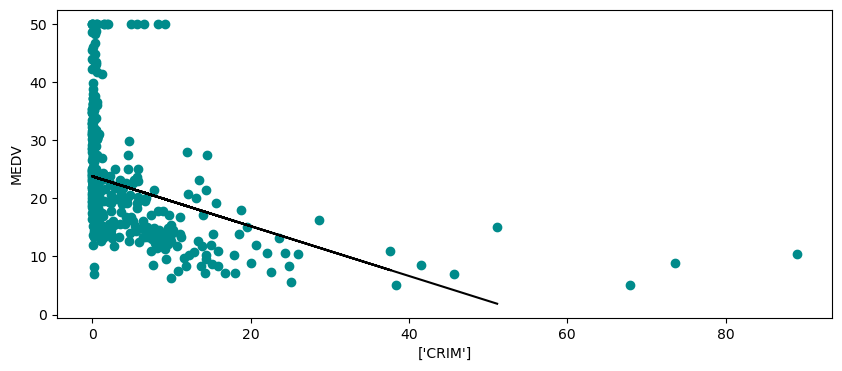

In [29]:
# Score and plot for CRIM 90% train 10% test
train_test_rmse_90_10(boston, ['CRIM'])

['NOX'] Intercept 90_10: 41.51628511771049
['NOX'] Co-efficent 90_10: [-34.64722001]
['NOX'] MAE 90_10: 7.888304039299349
['NOX'] MSE 90_10: 118.18742003914049
['NOX'] null RMSE 10.692530279021035
['NOX'] RMSE 90_10: 10.871403775002587
['NOX'] R2_90_10: -0.033737508936775074


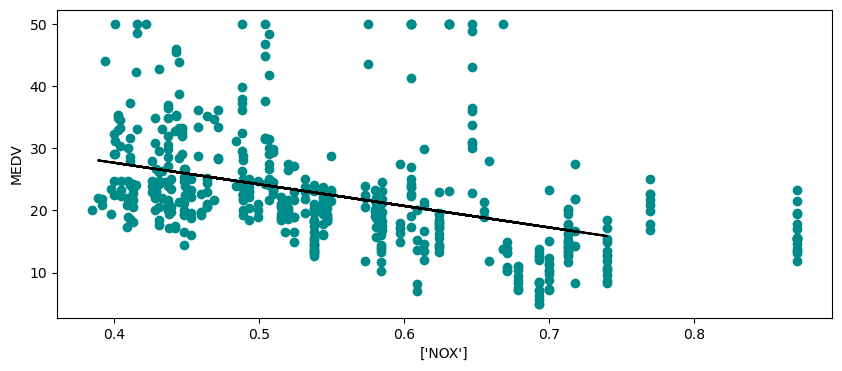

In [30]:
# Score and plot for NOX 90% train 10% test
train_test_rmse_90_10(boston, ['NOX'])

['INDUS'] Intercept 90_10: 29.728262959316545
['INDUS'] Co-efficent 90_10: [-0.66590363]
['INDUS'] MAE 90_10: 7.635190958187484
['INDUS'] MSE 90_10: 115.4005118043547
['INDUS'] null RMSE 10.692530279021035
['INDUS'] RMSE 90_10: 10.742463023178376
['INDUS'] R2_90_10: -0.009361551027644355


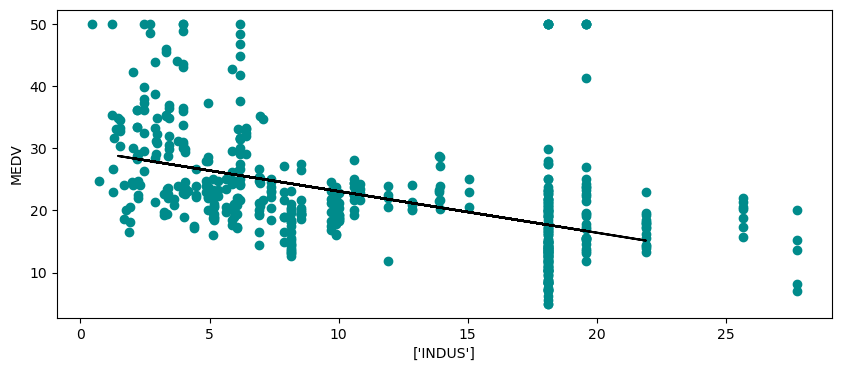

In [31]:
# Score and plot for INDUS 90% train 10% test
train_test_rmse_90_10(boston, ['INDUS'])

['AGE'] Intercept 90_10: 30.995171601172984
['AGE'] Co-efficent 90_10: [-0.12786397]
['AGE'] MAE 90_10: 7.576252551470543
['AGE'] MSE 90_10: 120.3619448781368
['AGE'] null RMSE 10.692530279021035
['AGE'] RMSE 90_10: 10.970959159441657
['AGE'] R2_90_10: -0.05275719723727912


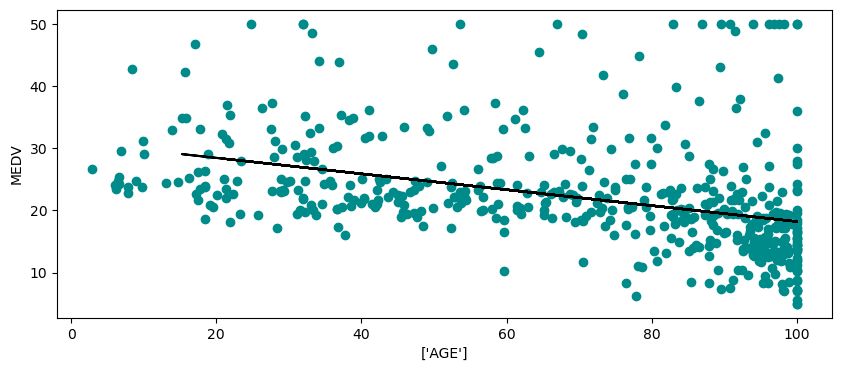

In [32]:
# Score and plot for AGE 90% train 10% test
train_test_rmse_90_10(boston, ['AGE'])

In [33]:
# Score for CRIM, NOX, INDUS and AGE 90% train 10% test

train_test_rmse_90_10(boston, ['CRIM', 'NOX', 'INDUS', 'AGE'])

['CRIM', 'NOX', 'INDUS', 'AGE'] Intercept 90_10: 31.73850555774823
['CRIM', 'NOX', 'INDUS', 'AGE'] Co-efficent 90_10: [-0.23855987 -4.29352525 -0.44487365 -0.01837692]
['CRIM', 'NOX', 'INDUS', 'AGE'] MAE 90_10: 7.498280560209053
['CRIM', 'NOX', 'INDUS', 'AGE'] MSE 90_10: 113.57496027873688
['CRIM', 'NOX', 'INDUS', 'AGE'] null RMSE 10.692530279021035
['CRIM', 'NOX', 'INDUS', 'AGE'] RMSE 90_10: 10.657155355850682
['CRIM', 'NOX', 'INDUS', 'AGE'] R2_90_10: 0.006605809000207352


## Comparison of RMSE Scores

| Variable | Original RMSE | 70-30 RMSE | 90-10 RMSE |
|:--------:|:-------------:|:----------:|:----------:|
|   CRIM   |     8.467     |    8.332   |   10.700   |
|    NOX   |     8.307     |    8.316   |   10.871   |
|   INDUS  |     8.042     |    8.213   |   10.742   |
|    AGE   |     8.510     |    8.389   |   10.971   |
| Combined |     7.785     |    7.960   |   10.657   |


| Variable | Original Null RMSE | 70-30 Null RMSE | 90-10 Null RMSE |
|:--------:|:------------------:|:---------------:|:---------------:|
|   CRIM   |        9.188       |      8.990      |      10.693     |
|    NOX   |        9.188       |      8.990      |      10.693     |
|   INDUS  |        9.188       |      8.990      |      10.693     |
|    AGE   |        9.188       |      8.990      |      10.693     |
| Combined |        9.188       |      8.990      |      10.693     |


| Variable | Original  R Square Error | 70-30 R Square Error | 90-10 R Square Error |
|:--------:|:------------------------:|:--------------------:|:--------------------:|
|   CRIM   |           0.151          |         0.141        |        -0.001        |
|    NOX   |           0.183          |         0.144        |        -0.034        |
|   INDUS  |           0.234          |         0.165        |        -0.009        |
|    AGE   |           0.142          |         0.129        |        -0.053        |
| Combined |           0.282          |         0.216        |         0.007        |


The 70-30 train/test/split model yielded RMSEs that were very similar to the original RMSEs - two were slightly lower while two were slightly higher.  However, the RMSEs for the 90-10 model were larger by about 2.5 units.  This suggests that the 90-10 model is overfitted (i.e. negative impact on model's generalisation).  This is likely because of the larger training data set used by the model which causes it to learn noise or random fluctuations as concepts.

The same pattern was also observed for the null RMSE for the 70-30 and 90-10 models - the 90/10 null RMSE was about 1.7 units larger.  Of note, the RMSE for the 70-30 model was lower than the original null RMSE by about 0.2 units while the RMSE for the 90-10 model was larger by 1.5 units.  This 

The RMSEs of the 70-30 model was lower than the 70-30 null RMSEs which signify an improvement in predictive accuracy.  However, and 90-10 model was higher than the 90-10 null RMSEs which signify a drop in predictive accuracy.

R square error scores across all models for the 70-30 model were lower than the original R square error scores.   The scores were even lower for the 90-10 model compared to the 70-30 model.  This means that both models will likely perform badly on an unseen dataset compared to the original model.  Of note, the score for the 90-10 model was negative which indicates that its predictions are worse than a constant function that always predicts the mean of the data.


## BONUS: Try the k-fold cross-validation technique described above, varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds? Include a written response.

In [34]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [35]:
def k_fold_cross_validation(df, feature_cols):
    X = df[feature_cols]
    y = df.MEDV
    n_folds = [*range(5,11,1)]

    linreg = LinearRegression()
    linreg.fit(X, y)
    
    for n in n_folds:
        kf = model_selection.KFold(n_splits=n, shuffle=True, random_state = 123)
        print(n,'_folds_RMSE: ',np.sqrt(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error'))), sep = '')
        print(n,'_folds_R2: ',np.mean(cross_val_score(linreg, X, y, cv=kf)),sep = '')

In [36]:
k_fold_cross_validation(boston, ['CRIM'])

5_folds_RMSE: 8.579768004367317
5_folds_R2: 0.12711805821537933
6_folds_RMSE: 8.595013110716701
6_folds_R2: 0.1102906966091849
7_folds_RMSE: 8.592664580963323
7_folds_R2: 0.1053776417953588
8_folds_RMSE: 8.587892964871422
8_folds_R2: 0.12403157435806138
9_folds_RMSE: 8.531626266781814
9_folds_R2: 0.12332468894047281
10_folds_RMSE: 8.54741918267155
10_folds_R2: 0.11891864951671287


In [37]:
k_fold_cross_validation(boston, ['NOX'])

5_folds_RMSE: 8.31876274650073
5_folds_R2: 0.1772258210264775
6_folds_RMSE: 8.334931252762022
6_folds_R2: 0.16782225975862927
7_folds_RMSE: 8.33751342856297
7_folds_R2: 0.1674692002826996
8_folds_RMSE: 8.345093755354384
8_folds_R2: 0.17251776947692987
9_folds_RMSE: 8.342568177645276
9_folds_R2: 0.16720837176117354
10_folds_RMSE: 8.33789136529832
10_folds_R2: 0.16664915865307708


In [38]:
k_fold_cross_validation(boston, ['INDUS'])

5_folds_RMSE: 8.054929067589493
5_folds_R2: 0.23082042449762064
6_folds_RMSE: 8.050378889525659
6_folds_R2: 0.22743907007260025
7_folds_RMSE: 8.059157638668038
7_folds_R2: 0.22231833052074995
8_folds_RMSE: 8.06667441439908
8_folds_R2: 0.22890089557501903
9_folds_RMSE: 8.057263230409134
9_folds_R2: 0.2327281761207035
10_folds_RMSE: 8.070218823567796
10_folds_R2: 0.22409902413288457


In [39]:
k_fold_cross_validation(boston, ['AGE'])

5_folds_RMSE: 8.52013101586144
5_folds_R2: 0.13784090847389768
6_folds_RMSE: 8.552874859680527
6_folds_R2: 0.12395951294770903
7_folds_RMSE: 8.537407794471829
7_folds_R2: 0.12522538911989803
8_folds_RMSE: 8.547480966458384
8_folds_R2: 0.13524226490127766
9_folds_RMSE: 8.556183451336985
9_folds_R2: 0.12777558986111512
10_folds_RMSE: 8.544875013665251
10_folds_R2: 0.12426371894152895


In [40]:
k_fold_cross_validation(boston, ['CRIM', 'NOX', 'INDUS', 'AGE'])

5_folds_RMSE: 7.874259327673012
5_folds_R2: 0.26539864203541896
6_folds_RMSE: 7.900279003141086
6_folds_R2: 0.25012385290803846
7_folds_RMSE: 7.875350855871586
7_folds_R2: 0.25598307871603493
8_folds_RMSE: 7.896180712124416
8_folds_R2: 0.262974197543686
9_folds_RMSE: 7.869028176836514
9_folds_R2: 0.2635262118269568
10_folds_RMSE: 7.858271626896093
10_folds_R2: 0.26674310702520704


## Analysis

The more folds there are, the larger the training dataset and the smaller the test dataset. 

| Variable | Original RMSE | 5-fold RMSE | 6-fold RMSE | 7-fold RMSE | 8-fold RMSE | 9-fold RMSE | 10-fold RMSE |
|:--------:|:-------------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:------------:|
|   CRIM   |     8.467     |    8.600    |    8.595    |    8.593    |    8.588    |    8.532    |     8.547    |
|    NOX   |     8.307     |    8.319    |    8.335    |    8.338    |    8.345    |    8.343    |     8.338    |
|   INDUS  |     8.042     |    8.054    |    8.050    |    8.059    |    8.067    |    8.057    |     8.070    |
|    AGE   |     8.510     |    8.520    |    8.553    |    8.537    |    8.547    |    8.556    |     8.545    |
| Combined |     7.785     |    7.874    |    7.900    |    7.875    |    7.896    |    7.869    |     7.858    |

The RMSEs for all the different folds for both the individual and combined models were observed to be slightly higher than the original RMSEs.  However, there does not appear to be a consistent trend observed across the different features for the number of folds.  

In the case of CRIM, the RMSE for 5-folds is 8.580.  This increases to 5.595 (6-folds) before decreasing with every subsequent fold until it reaches 8.531 (9-folds).  It then increases slightly to 8.547 (10-folds).

For NOX, the RMSE for 5-folds is 8.319.  The RMSE increases for the next three folds to peak at 8.345 (8-folds) before decreasing to 8.338 (10-folds).

For INDUS, the RMSE for 5-folds is 8.055.  It decreases to 8.050 (6-folds) before increasing and peaking 8.067 (8-folds).  It then decreases to 8.07 (10-folds).

For AGE, the RMSE for 5-folds is 8.520.  It then increases to 8.553 (6-folds) before decreasing to 8.537 (7-folds).  It then increases steadily to peak at 8.556 (9-folds) before dropping slightly to 8.545 (10-folds).

For the combined model, the RMSE for 5-folds is 7.874.  It then went up to 7.900 (6-folds) before decreasing to 7.88 (7 folds).  It then goes up to 7.90 (8 folds) before falling again over the next two folds to 7.86 (10 folds).

The number of folds which yielded the lowest RMSE for each variable are as follows:

CRIM: 9

NOX: 5

INDUS: 6

AGE: 5

Combined: 10


From the above results, we can infer that there does not appear to be a fixed relationship between the number of folds and the RMSE.  

| Variable | Original R Square Error | 5-fold R Square Error | 6-fold R Square Error | 7-fold R Square Error | 8-fold R Square Error | 9-fold R Square Error | 10-fold R Square Error |
|:--------:|:-----------------------:|:---------------------:|:---------------------:|:---------------------:|:---------------------:|:---------------------:|:----------------------:|
|   CRIM   |          0.151          |         0.127         |         0.110         |         0.105         |         0.124         |         0.123         |          0.119         |
|    NOX   |          0.183          |         0.178         |         0.168         |         0.167         |         0.173         |         0.167         |          0.167         |
|   INDUS  |          0.234          |         0.231         |         0.227         |         0.222         |         0.229         |         0.233         |          0.224         |
|    AGE   |          0.142          |         0.138         |         0.124         |         0.125         |         0.135         |         0.128         |          0.124         |
| Combined |          0.282          |         0.265         |         0.250         |         0.256         |         0.263         |         0.264         |          0.267         |

The R square error for all the different folds for both the individual and combined models were observed to be slightly lower than the R square error.  However, like what was observed for RMSE, there does not appear to be a consistent trend observed across the different features for the number of folds for R square error.

The number of folds which yielded the highest for each variable are as follows:

CRIM: 5

NOX: 5

INDUS: 9

AGE: 5

Combined: 10

From the above results, we can infer that there does not appear to be a fixed relationship between the number of folds and the R square error.  

## BONUS
Practice the same workflow you just worked through above, but this time use Statsmodels instead of Sklearn for linear regression. See example formulas below.

### Example: Statsmodels Formulas

Adjust the formula using your chosen metrics from the housing data. Remember, your workflow here is the same, but the syntax is a little different. Describe your results. Are they comparable to scikit-learn's regression models?

In [41]:
# First, format your data in a DataFrame

url = '../data/boston_data.csv'
boston = pd.read_csv(url)
boston.rename(columns={' ZN ':'ZN', 'INDUS ': 'INDUS'}, inplace=True)
df = boston
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [42]:
# Set up your new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ NOX + INDUS + CRIM + AGE" , # - 1 = remove intercept
    "case2": "MEDV ~ CRIM",
    "case3": "MEDV ~ NOX",
    "case4": "MEDV ~ INDUS", 
    "case5": "MEDV ~ AGE"
}

model_1 = smf.ols(formula=formulas['case1'], data=df)
model_2 = smf.ols(formula=formulas['case2'], data=df)
model_3 = smf.ols(formula=formulas['case3'], data=df)
model_4 = smf.ols(formula=formulas['case4'], data=df)
model_5 = smf.ols(formula=formulas['case5'], data=df)

result_1 = model_1.fit()
result_2 = model_2.fit()
result_3 = model_3.fit()
result_4 = model_4.fit()
result_5 = model_5.fit()


In [43]:
# result for NOX + INDUS + CRIM + AGE
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     49.22
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           6.25e-35
Time:                        23:06:18   Log-Likelihood:                -1756.4
No. Observations:                 506   AIC:                             3523.
Df Residuals:                     501   BIC:                             3544.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.5899      2.100     15.046      0.000      27.465      35.715
NOX           -3.8255      5.375     -0.712      0.477     -14.386       6.735
INDUS         -0.4308      0.081     -5.326      0.000      -0.590      -0.272
CRIM          -0.2319      0.045     -5.137      0.000      -0.321      -0.143
AGE           -0.0190      0.019     -1.024      0.307      -0.055       0.017
==============================================================================
Omnibus:                      202.244   Durbin-Watson:                   0.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.218
Skew:                           1.869   Prob(JB):                    1.34e-155
Kurtosis:                       7.456   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# result for CRIM
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           1.17e-19
Time:                        23:06:18   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# result for NOX
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     112.6
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           7.07e-24
Time:                        23:06:18   Log-Likelihood:                -1789.2
No. Observations:                 506   AIC:                             3582.
Df Residuals:                     504   BIC:                             3591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.3459      1.811     22.828      0.000      37.787      44.904
NOX          -33.9161      3.196    -10.611      0.000     -40.196     -27.636
==============================================================================
Omnibus:                      165.520   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.900
Skew:                           1.641   Prob(JB):                     2.70e-94
Kurtosis:                       6.109   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# result for INDUS
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     154.0
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           4.90e-31
Time:                        23:06:18   Log-Likelihood:                -1772.8
No. Observations:                 506   AIC:                             3550.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.7549      0.683     43.537      0.000      28.412      31.098
INDUS         -0.6485      0.052    -12.408      0.000      -0.751      -0.546
==============================================================================
Omnibus:                      178.432   Durbin-Watson:                   0.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.993
Skew:                           1.672   Prob(JB):                    5.59e-123
Kurtosis:                       6.939   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# result for AGE
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           1.57e-18
Time:                        23:06:18   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.000      29.016      32.942
AGE           -0.1232      0.013     -9.137      0.000      -0.150      -0.097
==============================================================================
Omnibus:                      170.034   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.983
Skew:                           1.671   Prob(JB):                    5.85e-100
Kurtosis:                       6.240   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Results are comparable to scikit-learn's regression models.

| Variable | SciKit R Square Error | Statsmodels R Square Error |
|:--------:|:---------------------:|:--------------------------:|
|   CRIM   |         0.151         |            0.151           |
|    NOX   |         0.183         |            0.183           |
|   INDUS  |         0.234         |            0.234           |
|    AGE   |         0.142         |            0.142           |
| Combined |         0.282         |            0.282           |


### BONUS:

Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

In [48]:
# Taken from https://machinelearningmastery.com/feature-selection-for-regression-data/
# Used to surface the best features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = boston.drop(['MEDV'], axis = 1)
y = boston.MEDV

def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state=123)
    
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 62.975906
Feature 1: 50.685935
Feature 2: 122.884333
Feature 3: 3.431228
Feature 4: 85.468872
Feature 5: 437.020506
Feature 6: 59.828065
Feature 7: 24.700264
Feature 8: 67.998690
Feature 9: 120.794051
Feature 10: 135.948947
Feature 11: 433.597785


Features 5 (RM; Average number of rooms per dwelling) and 11 (LSTAT; Percentage of lower status of the population) have the highest feature importance scores (i.e. the largest correlation with the MEDV)

In [49]:
# Test to see impact on R square error scores
# Case 1 = Top 2 (RM + LSTAT)
# Case 2 = Next top 3 (INDUS + TAX + PTRATIO)
# Case 3 = Bottom 3 (ZN + CHAS + DIS)
formulas = {
    "case1": "MEDV ~ RM + LSTAT" , # - 1 = remove intercept
    "case2": "MEDV ~ INDUS + TAX + PTRATIO",
    "case3": "MEDV ~ ZN + CHAS + DIS"
}

model_1 = smf.ols(formula=formulas['case1'], data=df)
model_2 = smf.ols(formula=formulas['case2'], data=df)
model_3 = smf.ols(formula=formulas['case3'], data=df)

result_1 = model_1.fit()
result_2 = model_2.fit()
result_3 = model_2.fit()


In [50]:
# result for RM + LSTAT
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sun, 27 Nov 2022   Prob (F-statistic):          7.01e-112
Time:                        23:06:18   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# result for INDUS + TAX + PTRATIO
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     94.75
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           1.33e-48
Time:                        23:06:18   Log-Likelihood:                -1726.7
No. Observations:                 506   AIC:                             3461.
Df Residuals:                     502   BIC:                             3478.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.7422      2.884     19.675      0.000      51.076      62.408
INDUS         -0.3571      0.069     -5.159      0.000      -0.493      -0.221
TAX           -0.0062      0.003     -2.117      0.035      -0.012      -0.000
PTRATIO       -1.5008      0.171     -8.761      0.000      -1.837      -1.164
==============================================================================
Omnibus:                      186.392   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.305
Skew:                           1.675   Prob(JB):                    2.82e-151
Kurtosis:                       7.654   Cond. No.                     3.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# result for ZN + CHAS + DIS
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     94.75
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           1.33e-48
Time:                        23:06:18   Log-Likelihood:                -1726.7
No. Observations:                 506   AIC:                             3461.
Df Residuals:                     502   BIC:                             3478.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.7422      2.884     19.675      0.000      51.076      62.408
INDUS         -0.3571      0.069     -5.159      0.000      -0.493      -0.221
TAX           -0.0062      0.003     -2.117      0.035      -0.012      -0.000
PTRATIO       -1.5008      0.171     -8.761      0.000      -1.837      -1.164
==============================================================================
Omnibus:                      186.392   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.305
Skew:                           1.675   Prob(JB):                    2.82e-151
Kurtosis:                       7.654   Cond. No.                     3.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R square error scores reflect the strength of the correlation.

|       Variables       | R Square Error |
|:---------------------:|:--------------:|
|       RM + LSTAT      |      0.639     |
| INDUS + TAX + PTRATIO |      0.542     |
|    ZN + CHAS + DIS    |      0.362     |

### BONUS:

Given a combination of predictors, can you identify another response variable that could be accurately predicted through the exploration of different predictors in this data set?

_Tip: Consider pairplots, coefficients, or Pearson scores._

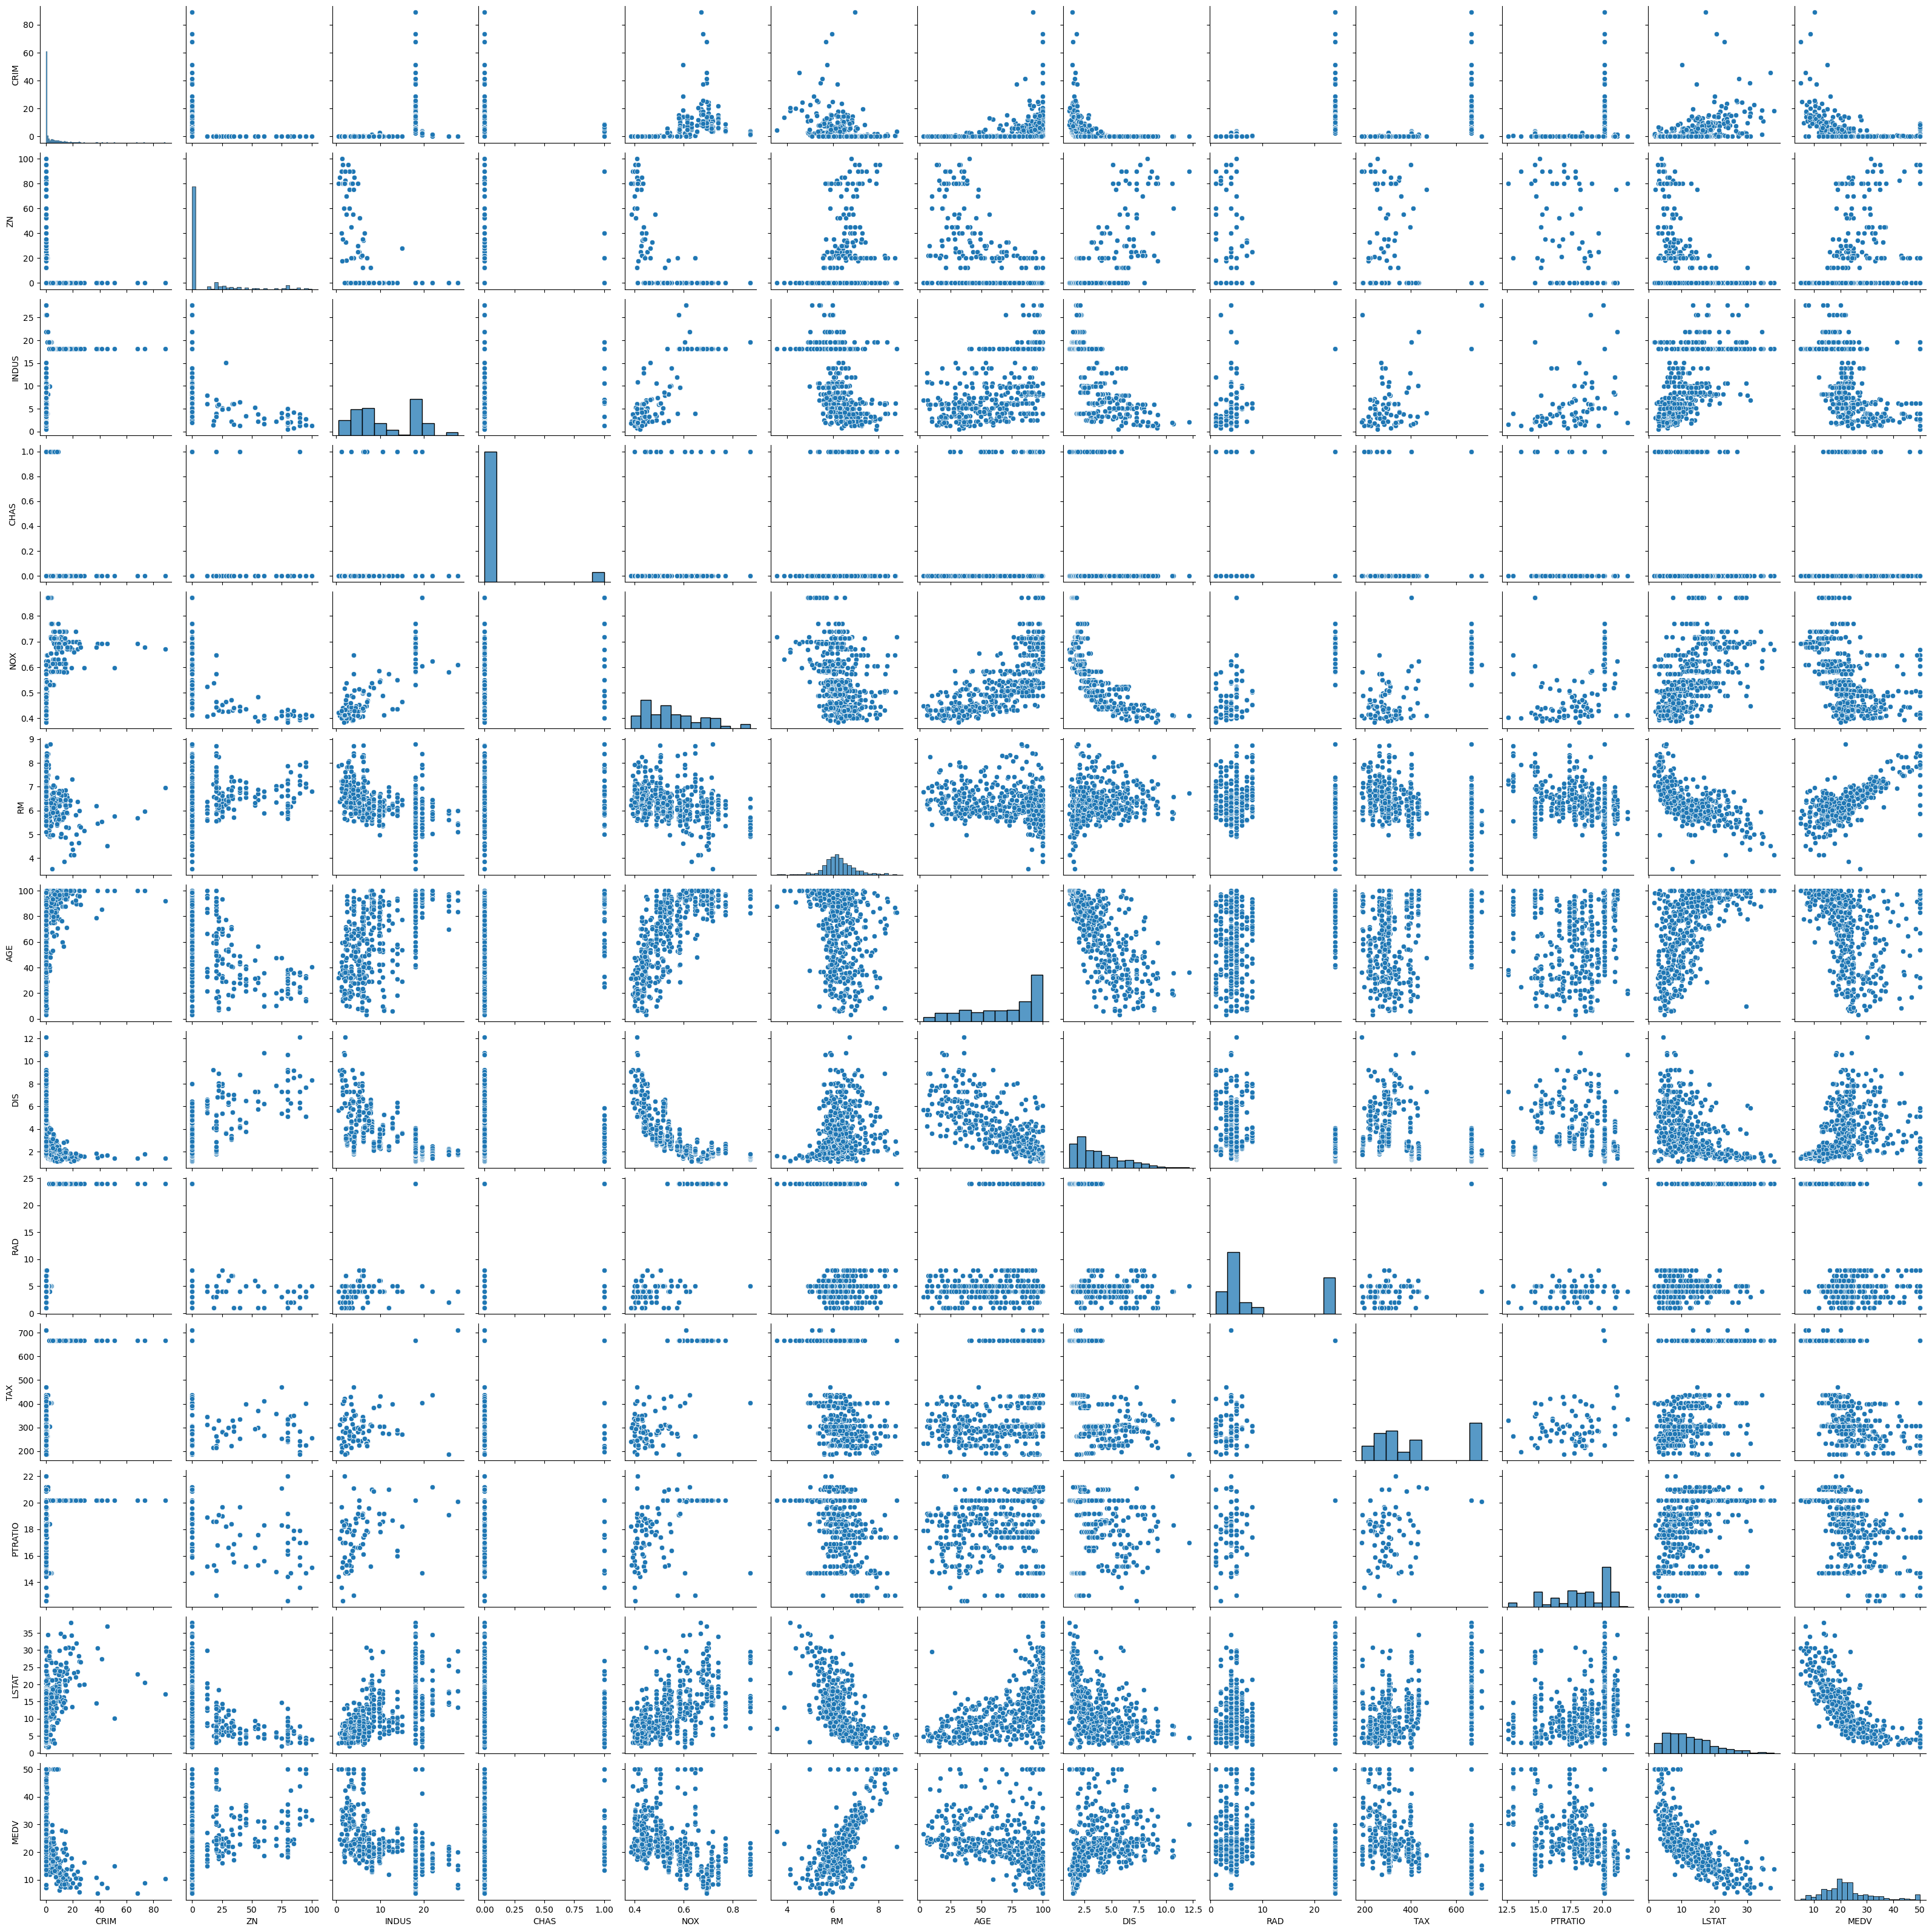

In [53]:
# Check out variable relations
import seaborn as sns

cols_1 = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

sns.pairplot(boston, x_vars=cols_1, y_vars=cols_1);

<AxesSubplot:>

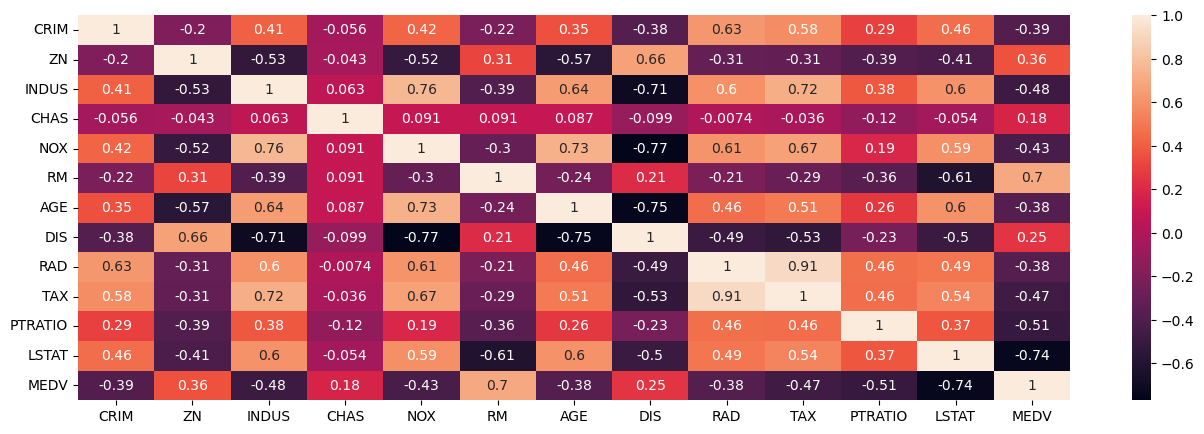

In [54]:
# Check out Pearson scores
plt.figure(figsize=(16,5))
sns.heatmap(boston.corr(), annot = True)

Yes, it appears that the response variable DIS (weighted distances to five Boston employment centers) can be accurately predicted through the exploration of different predictors in this data set such as INDUS, NOX and AGE due to their strong correlation scores.

## BONUS/DEMO: Up for an additional challenge? Try again, this time using the `patsy` library.

In [55]:
import patsy

# Add response to the core DataFrame
boston['MEDV'] = y

In [56]:
# R^2 Score for RM + LSTAT
y, X = patsy.dmatrices("MEDV ~ RM + LSTAT", data=boston, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=123)

lm = LinearRegression()

model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)

print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.5121950898592784


In [57]:
# Check against R^2 score using earlier created function
train_test_rmse_70_30(boston, ['LSTAT', 'RM'])

['LSTAT', 'RM'] Intercept 70_30: -7.992171238125376
['LSTAT', 'RM'] Co-efficent 70_30: [-0.5887417   6.04480544]
['LSTAT', 'RM'] MAE 70_30: 4.496412721828925
['LSTAT', 'RM'] MSE 70_30: 39.428339995119465
['LSTAT', 'RM'] null RMSE 8.990444464676797
['LSTAT', 'RM'] RMSE 70_30: 6.279198993113649
['LSTAT', 'RM'] R2_70_30: 0.5121950898592784


In [58]:
# R^2 Score for INDUS + TAX + PTRATIO
y, X = patsy.dmatrices("MEDV ~ INDUS + TAX + PTRATIO", data=boston, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=123)

lm = LinearRegression()

model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)

print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.2702110660265161


In [59]:
# Check against R^2 score using earlier created function
train_test_rmse_70_30(boston, ['INDUS', 'TAX', 'PTRATIO'])

['INDUS', 'TAX', 'PTRATIO'] Intercept 70_30: 58.51283599650739
['INDUS', 'TAX', 'PTRATIO'] Co-efficent 70_30: [-0.34672309 -0.00842021 -1.55053492]
['INDUS', 'TAX', 'PTRATIO'] MAE 70_30: 5.257193836203787
['INDUS', 'TAX', 'PTRATIO'] MSE 70_30: 58.987446856739375
['INDUS', 'TAX', 'PTRATIO'] null RMSE 8.990444464676797
['INDUS', 'TAX', 'PTRATIO'] RMSE 70_30: 7.680328564374012
['INDUS', 'TAX', 'PTRATIO'] R2_70_30: 0.27021106602651535


In [60]:
# R^2 Score for ZN + CHAS + DIS

y, X = patsy.dmatrices("MEDV ~ ZN + CHAS + DIS", data=boston, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=123)

lm = LinearRegression()

model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)

print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.21190587594722765


In [61]:
# Check against R^2 score using earlier created function
train_test_rmse_70_30(boston, ['ZN', 'CHAS', 'DIS'])

['ZN', 'CHAS', 'DIS'] Intercept 70_30: 20.24553050016602
['ZN', 'CHAS', 'DIS'] Co-efficent 70_30: [0.13157456 4.16308077 0.19856039]
['ZN', 'CHAS', 'DIS'] MAE 70_30: 5.838933599419142
['ZN', 'CHAS', 'DIS'] MSE 70_30: 63.70014410544694
['ZN', 'CHAS', 'DIS'] null RMSE 8.990444464676797
['ZN', 'CHAS', 'DIS'] RMSE 70_30: 7.981237003462994
['ZN', 'CHAS', 'DIS'] R2_70_30: 0.21190587594722765


The R^2 Scores obtained using the Patsy library are noted to be identical to the scores obtained using the earlier created functions.